In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('datasets/train.csv')
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [28]:
df.shape

(42000, 785)

In [29]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [30]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

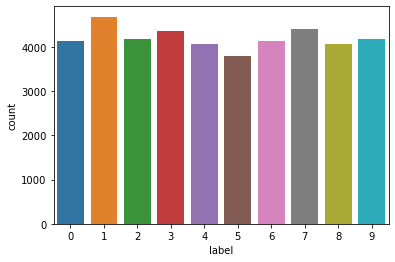

In [31]:
sns.countplot(data=df,x=y)

In [32]:
x.sample(1)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
31430       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
31430       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
31430         0         0         0         0         0  

[1 rows x 784 columns]

Text(0.5, 1.0, 'number is 5')

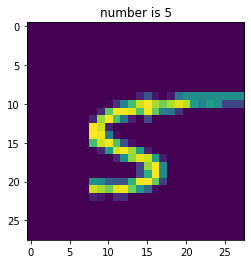

In [33]:
plt.imshow(x.iloc[244,:].values.reshape(28,28))
plt.title(f"number is {y[244]}")

In [34]:
x.sample()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
34409       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
34409       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
34409         0         0         0         0         0  

[1 rows x 784 columns]

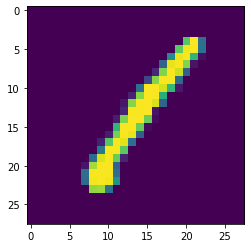

In [35]:
plt.imshow(x.iloc[0,:].values.reshape(28,28))

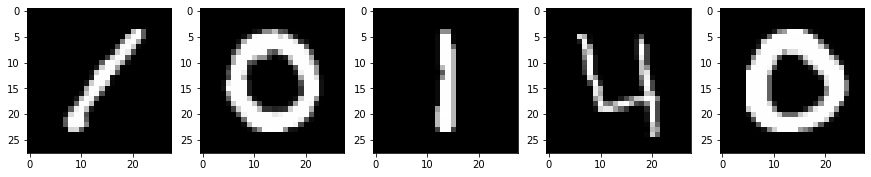

In [36]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(x.iloc[i,:].values.reshape(28,28),cmap='gray')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9657142857142857

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
std = StandardScaler()
x_train_trf = std.fit_transform(x_train)
x_test_trf = std.transform(x_test)

In [45]:
x_train_trf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=100)

In [48]:
x_train_pca = pca.fit_transform(x_train_trf)
x_test_pca = pca.transform(x_test)

C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [49]:
x_train_pca.shape

(29400, 100)

In [50]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [52]:
y_pred_pca = knn_pca.predict(x_test_pca)

In [53]:
accuracy_score(y_test,y_pred_pca)

0.768015873015873

In [54]:
for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_pca = pca.fit_transform(x_train_trf)
    x_test_pca = pca.transform(x_test)
    knn.fit(x_train_pca,y_train)
    y_pred_pca = knn.predict(x_test_pca)
    print(f"Iteration : {i} {accuracy_score(y_test,y_pred_pca)}")

C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 1 0.18587301587301588


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 2 0.1353174603174603


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 3 0.2311111111111111


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 4 0.2594444444444444


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 5 0.363015873015873


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 6 0.40134920634920634


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 7 0.43103174603174604


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 8 0.4707142857142857


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 9 0.4719047619047619


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 10 0.4638095238095238


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 11 0.46785714285714286


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Iteration : 12 0.48325396825396827


C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


KeyboardInterrupt: 

In [63]:
pca_dim= PCA(n_components=3)
x_train_pca = pca_dim.fit_transform(x_train_trf)
x_test_pca = pca_dim.transform(x_test)
x_train_pca.shape

C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names



(29400, 3)

In [64]:
# !pip install plotly
import plotly.express as px
px.scatter(x_train_pca[:,0],x_train_pca[:,1])

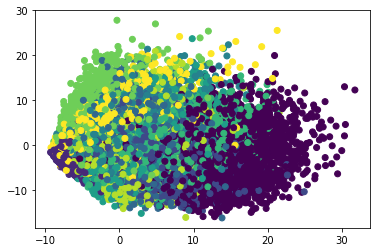

In [65]:
#import plotly.express as px
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train)

In [66]:
d=y_train.astype(str)

In [67]:
import plotly.express as px
px.scatter_3d(x=x_train_pca[:,0],y=x_train_pca[:,1],z=x_train_pca[:,2],color=d)


C:\Users\User15\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning:

invalid value encountered in sqrt



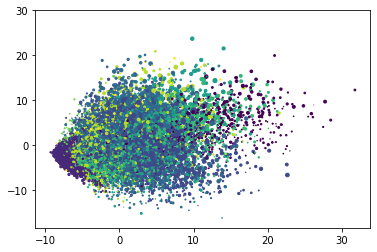

In [68]:
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],x_train_pca[:,2],c=y_train)


In [69]:

pca.explained_variance_

array([40.59588171, 29.31939629, 26.705399  , 20.79061603, 18.06430776,
       15.75866099, 13.93062652, 12.52034899, 11.12707722, 10.08205158,
        9.71636769,  8.71101004,  8.02118987])

In [71]:

pca.components_.shape

(13, 784)

In [70]:
pca.explained_variance_ratio_*100

array([5.84935171, 4.22455317, 3.84790932, 2.9956641 , 2.60283766,
       2.2706232 , 2.00722661, 1.8040235 , 1.60327071, 1.45269577,
       1.40000536, 1.25514607, 1.15575173])

In [72]:
d = y_train.astype(str)
pca_dim = PCA()
x_train_pca = pca_dim.fit_transform(x_train_trf)
x_test_pca = pca_dim.transform(x_test)
pca_dim.explained_variance_ratio_*100

C:\Users\User15\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names



array([5.84935171e+00, 4.22455317e+00, 3.84790932e+00, 2.99566411e+00,
       2.60283768e+00, 2.27062325e+00, 2.00722706e+00, 1.80402768e+00,
       1.60330442e+00, 1.45271448e+00, 1.40019450e+00, 1.25521838e+00,
       1.15606423e+00, 1.13774951e+00, 1.07853036e+00, 1.03298491e+00,
       9.70395520e-01, 9.57399383e-01, 9.34237163e-01, 9.12905801e-01,
       8.58260664e-01, 8.33084537e-01, 8.04735721e-01, 7.70710198e-01,
       7.48672901e-01, 7.13847382e-01, 7.08900817e-01, 6.86255797e-01,
       6.51284381e-01, 6.37463674e-01, 6.28489824e-01, 6.22514458e-01,
       6.00492008e-01, 5.86809038e-01, 5.80058199e-01, 5.67056254e-01,
       5.49320588e-01, 5.35830886e-01, 5.23765424e-01, 5.10018441e-01,
       4.98834932e-01, 4.93105367e-01, 4.77954113e-01, 4.67097346e-01,
       4.62488902e-01, 4.57313741e-01, 4.54632903e-01, 4.41634541e-01,
       4.37056088e-01, 4.26388524e-01, 4.19607359e-01, 4.15478962e-01,
       4.05136934e-01, 4.01094749e-01, 3.88302168e-01, 3.85735414e-01,
      

In [73]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05849352, 0.10073905, 0.13921814, 0.16917478, 0.19520316,
       0.21790939, 0.23798166, 0.25602189, 0.2720546 , 0.28658156,
       0.30058161, 0.31313307, 0.32469059])

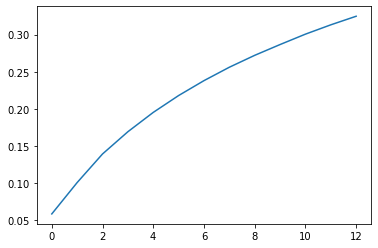

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))